<a href="https://colab.research.google.com/github/Blitzpranav/house_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [7]:
# IMPORTING DATA
import pandas as pd
df = pd.read_csv('house_dataset.csv.xls')
df.set_index('Id', inplace = True)

df.head(5)

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,8450.0,196.0,150.0,856.0,856.0,854.0,1710.0,548.0,0.0,61.0,208500.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,9600.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,460.0,298.0,0.0,181500.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# New Section

In [8]:
df.dropna(inplace = True)

print(cl(df.isnull().sum(), attrs = ['bold']))


LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64


In [ ]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [9]:
print(cl(df.dtypes, attrs = ['bold']))

LotArea        float64
MasVnrArea     float64
BsmtUnfSF      float64
TotalBsmtSF    float64
1stFlrSF       float64
2ndFlrSF       float64
GrLivArea      float64
GarageArea     float64
WoodDeckSF     float64
OpenPorchSF    float64
SalePrice      float64
dtype: object


In [10]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce')
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

print(cl(df.dtypes, attrs = ['bold']))

LotArea        float64
MasVnrArea       int64
BsmtUnfSF      float64
TotalBsmtSF    float64
1stFlrSF       float64
2ndFlrSF       float64
GrLivArea      float64
GarageArea     float64
WoodDeckSF     float64
OpenPorchSF    float64
SalePrice      float64
dtype: object


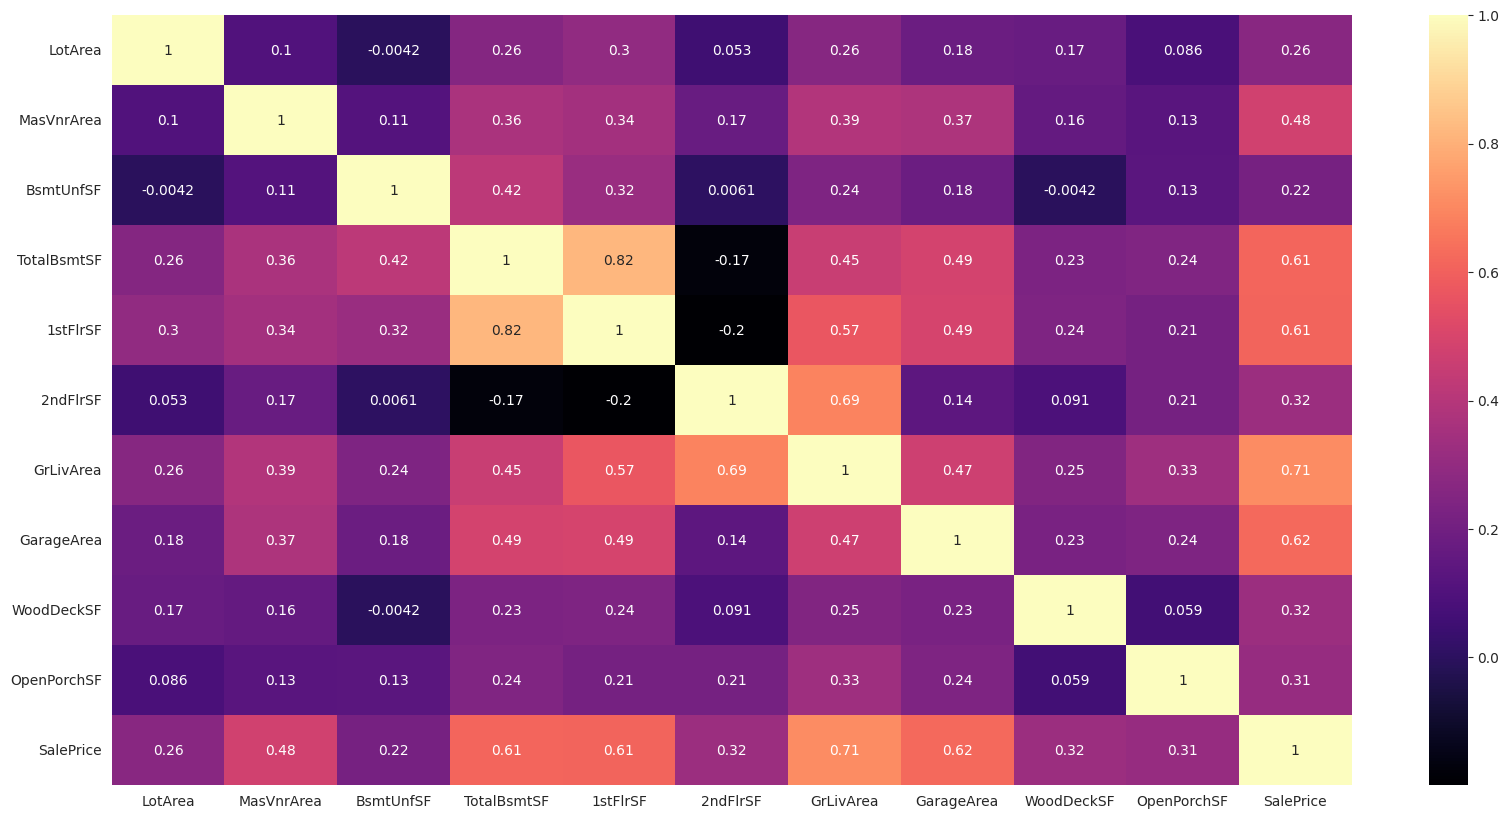

In [11]:
# 1. Heatmap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

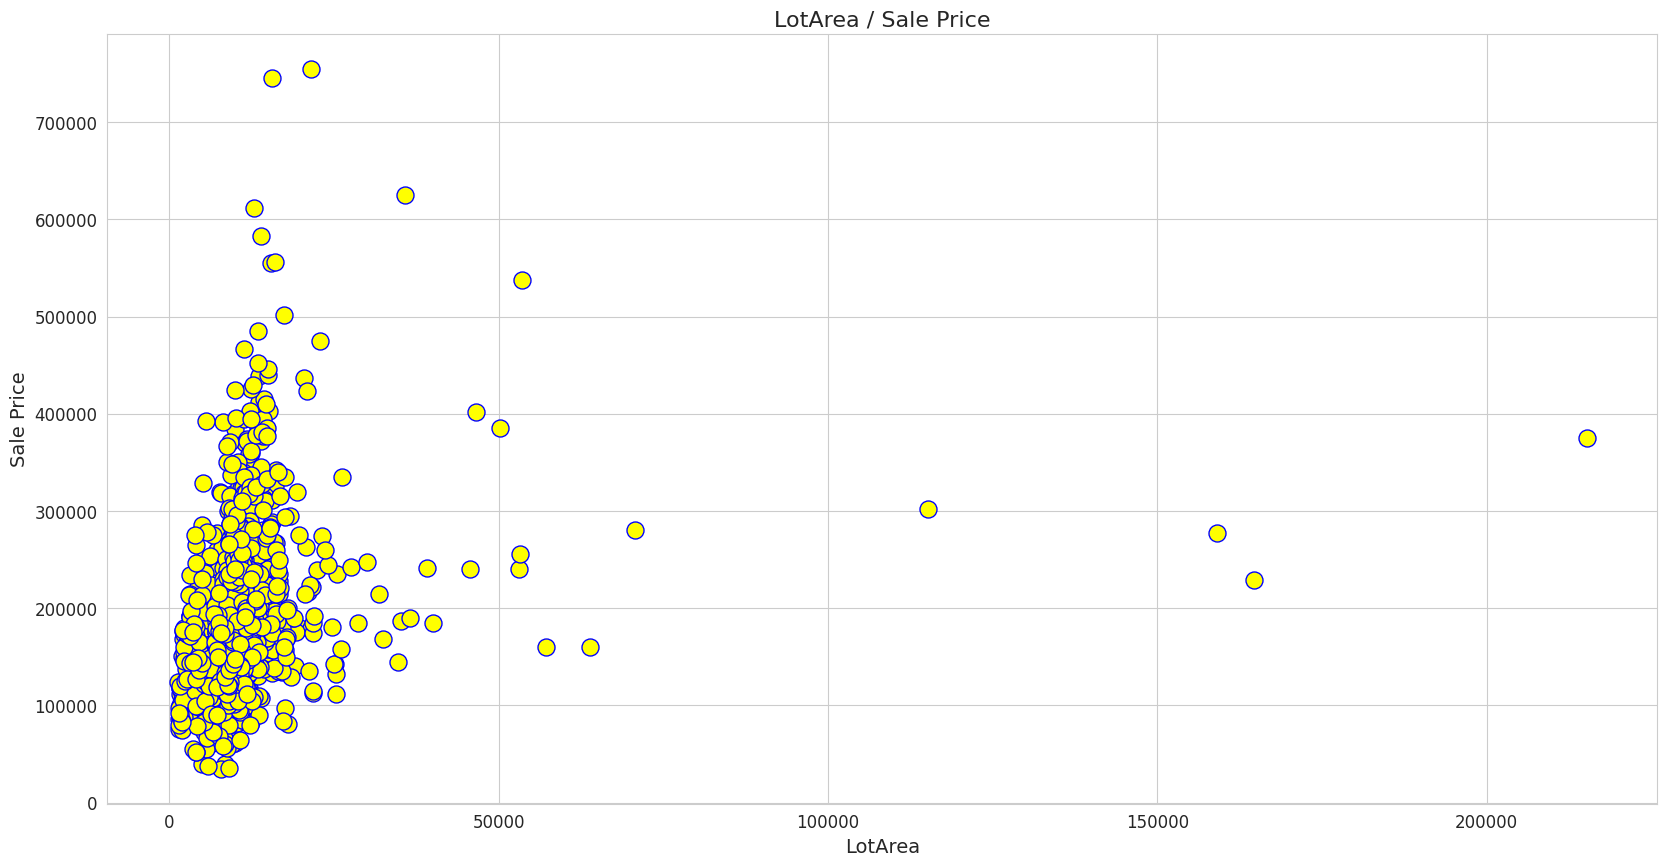

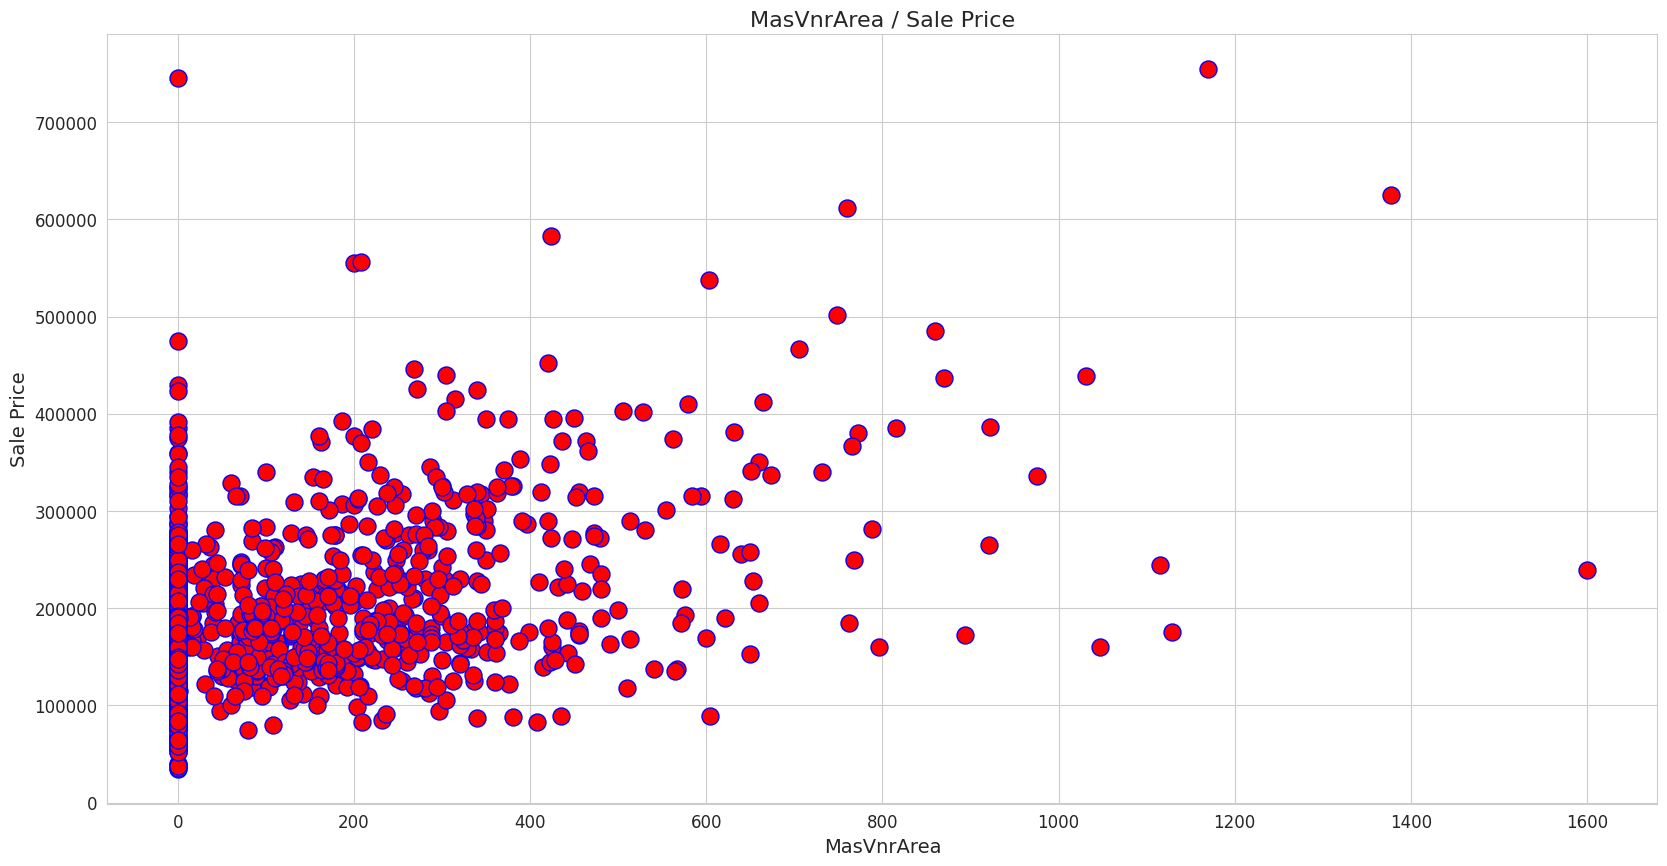

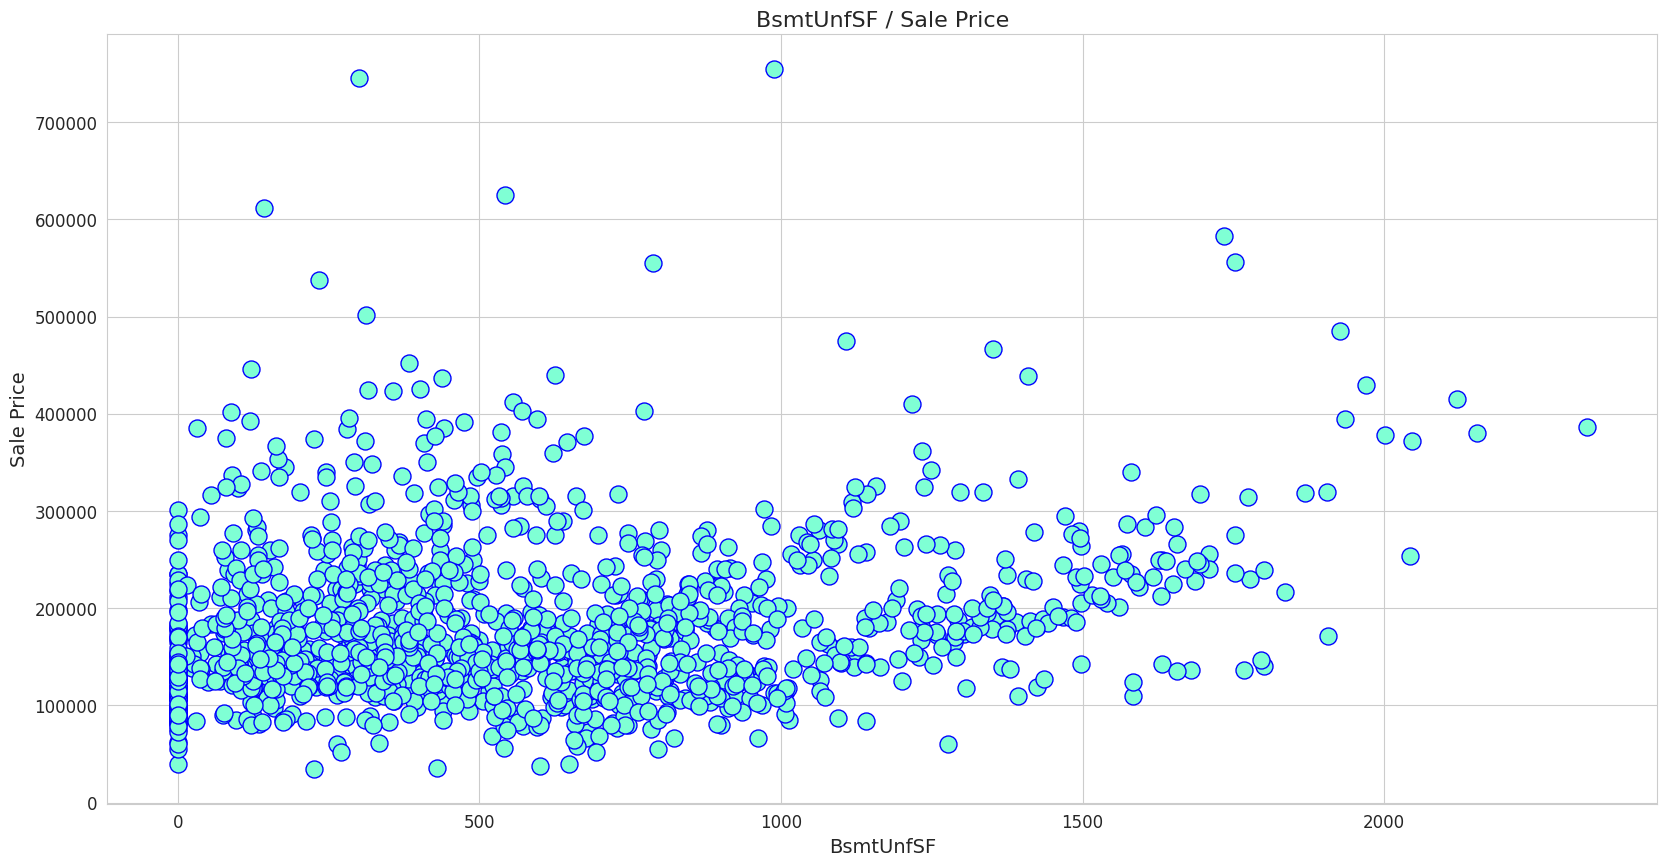

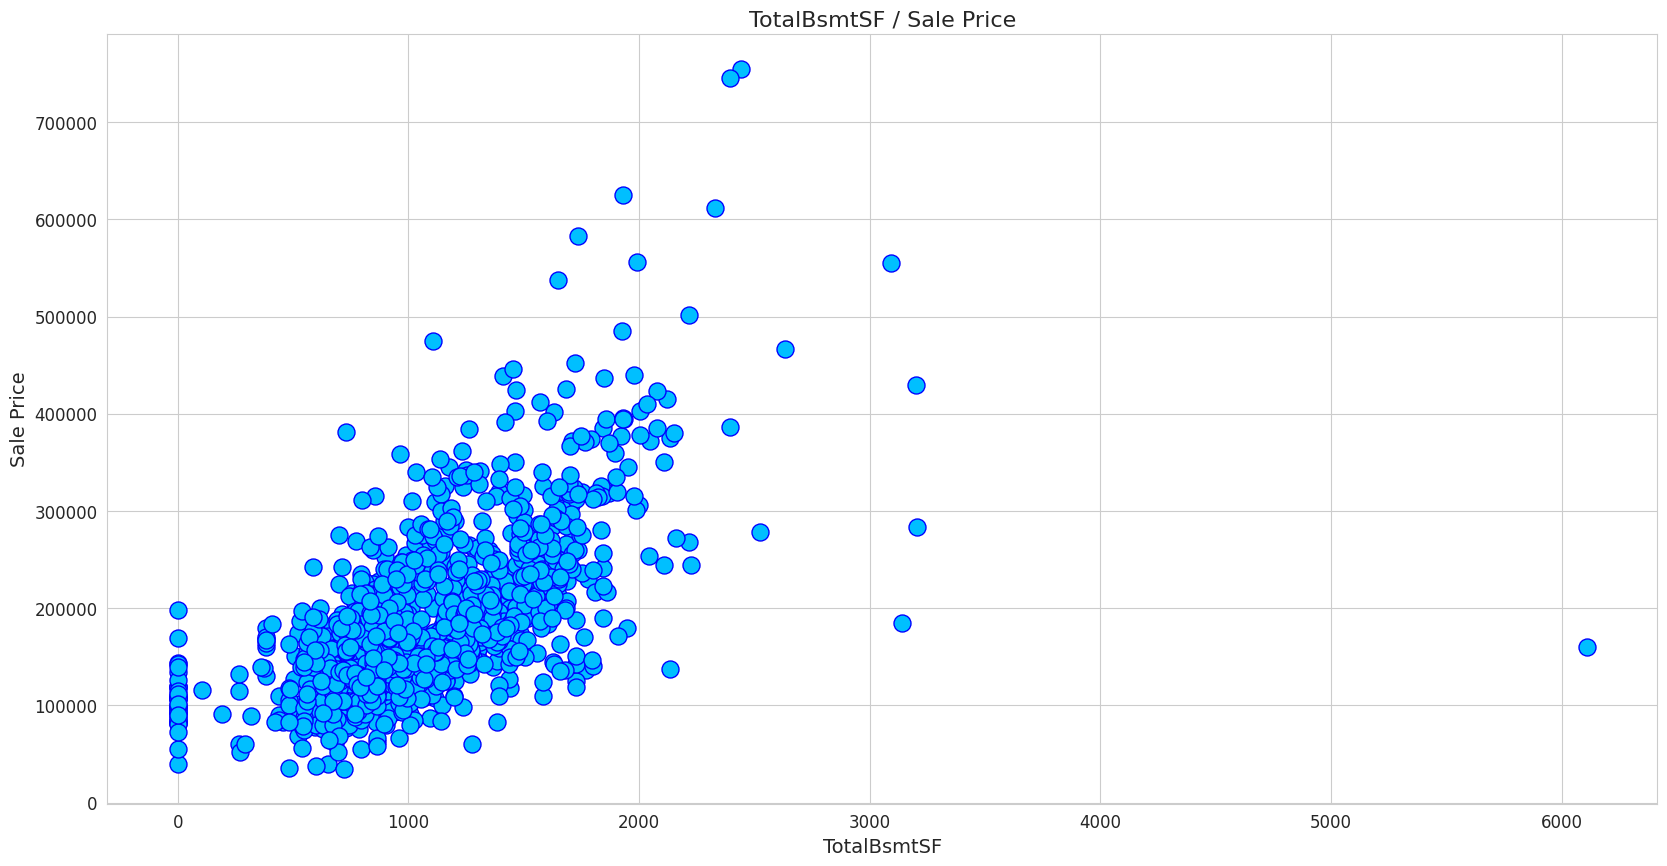

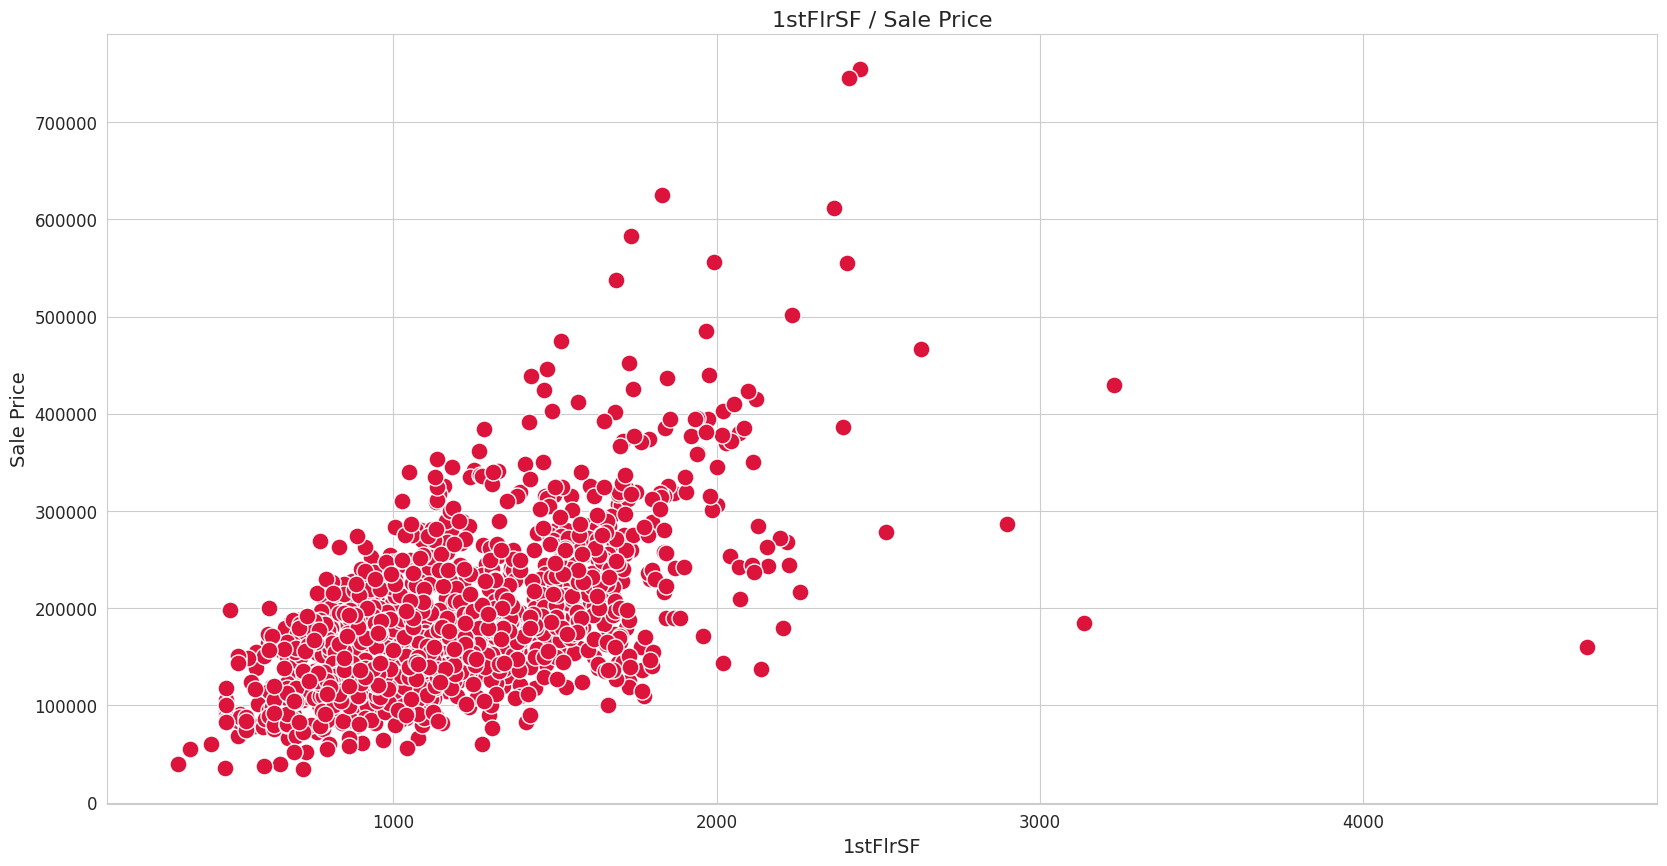

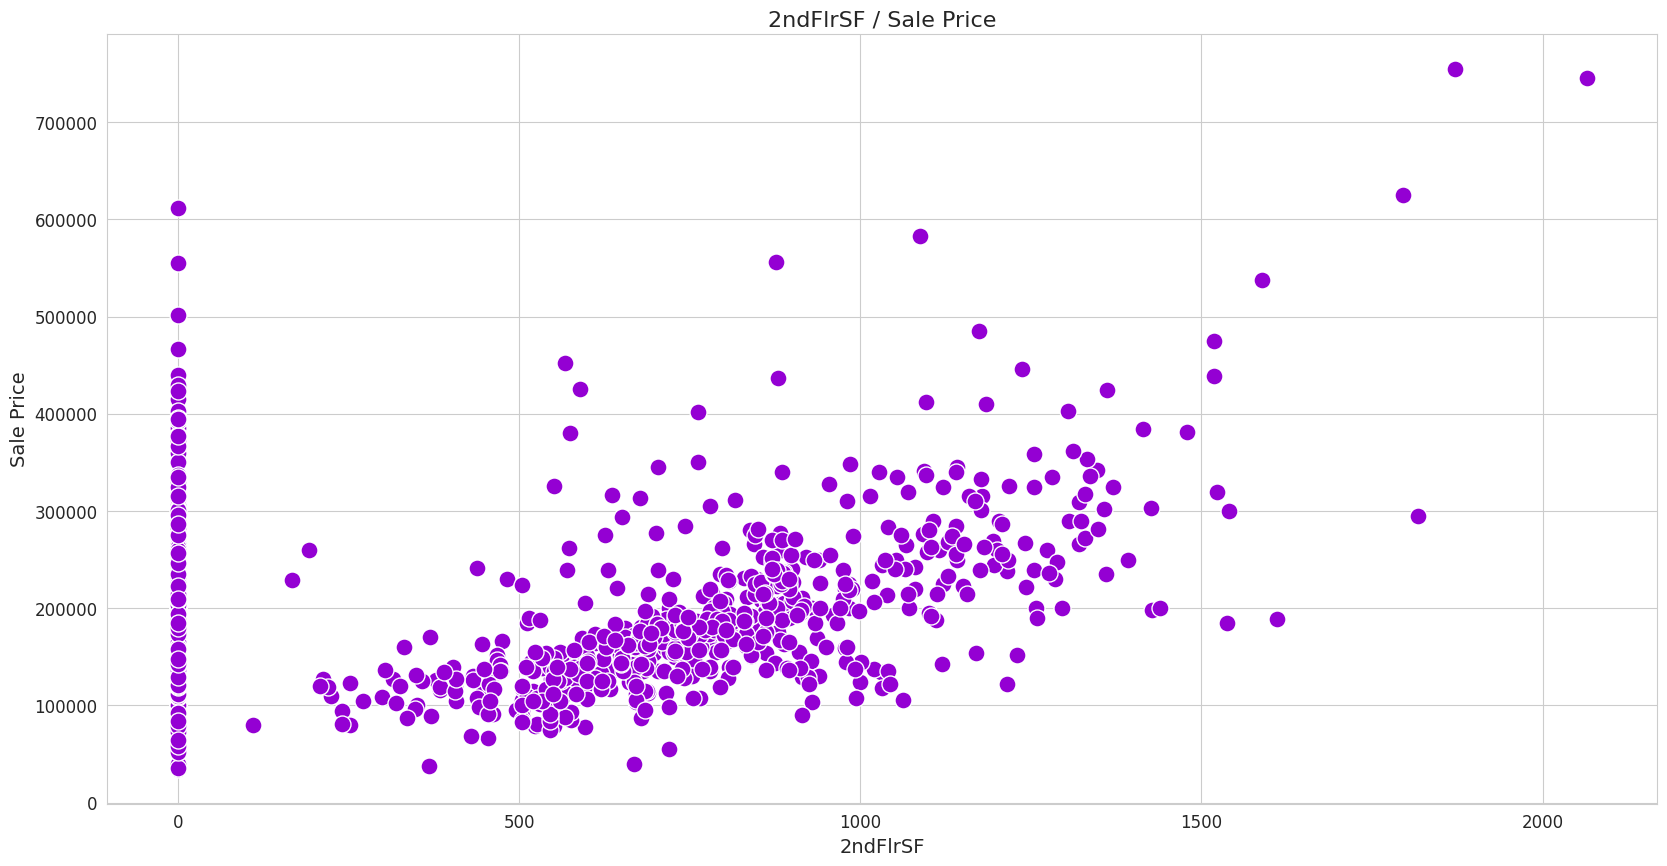

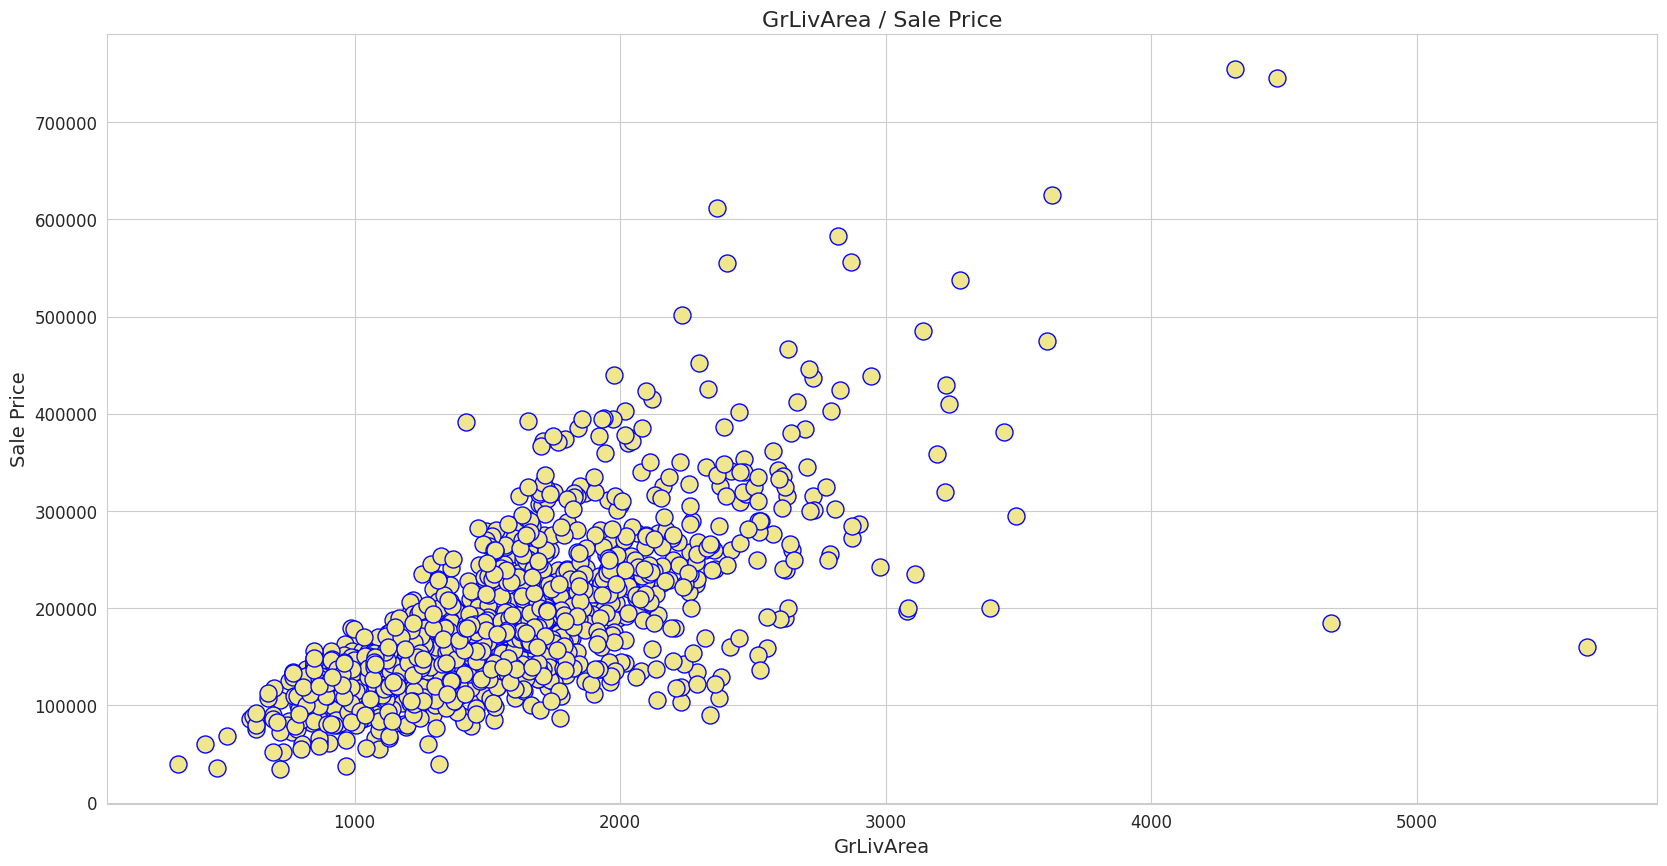

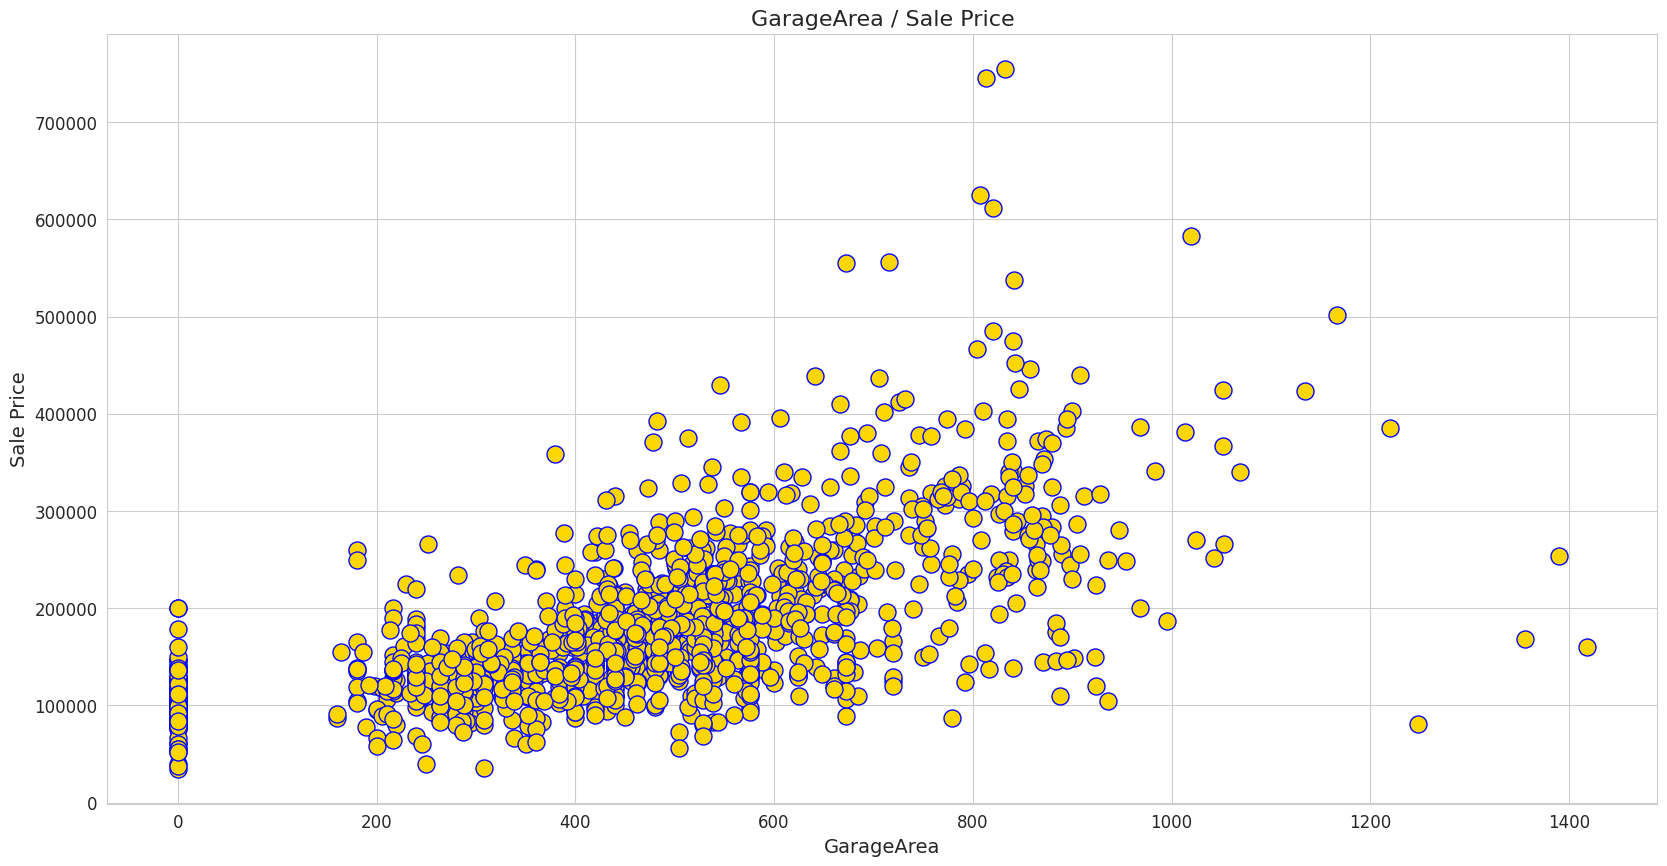

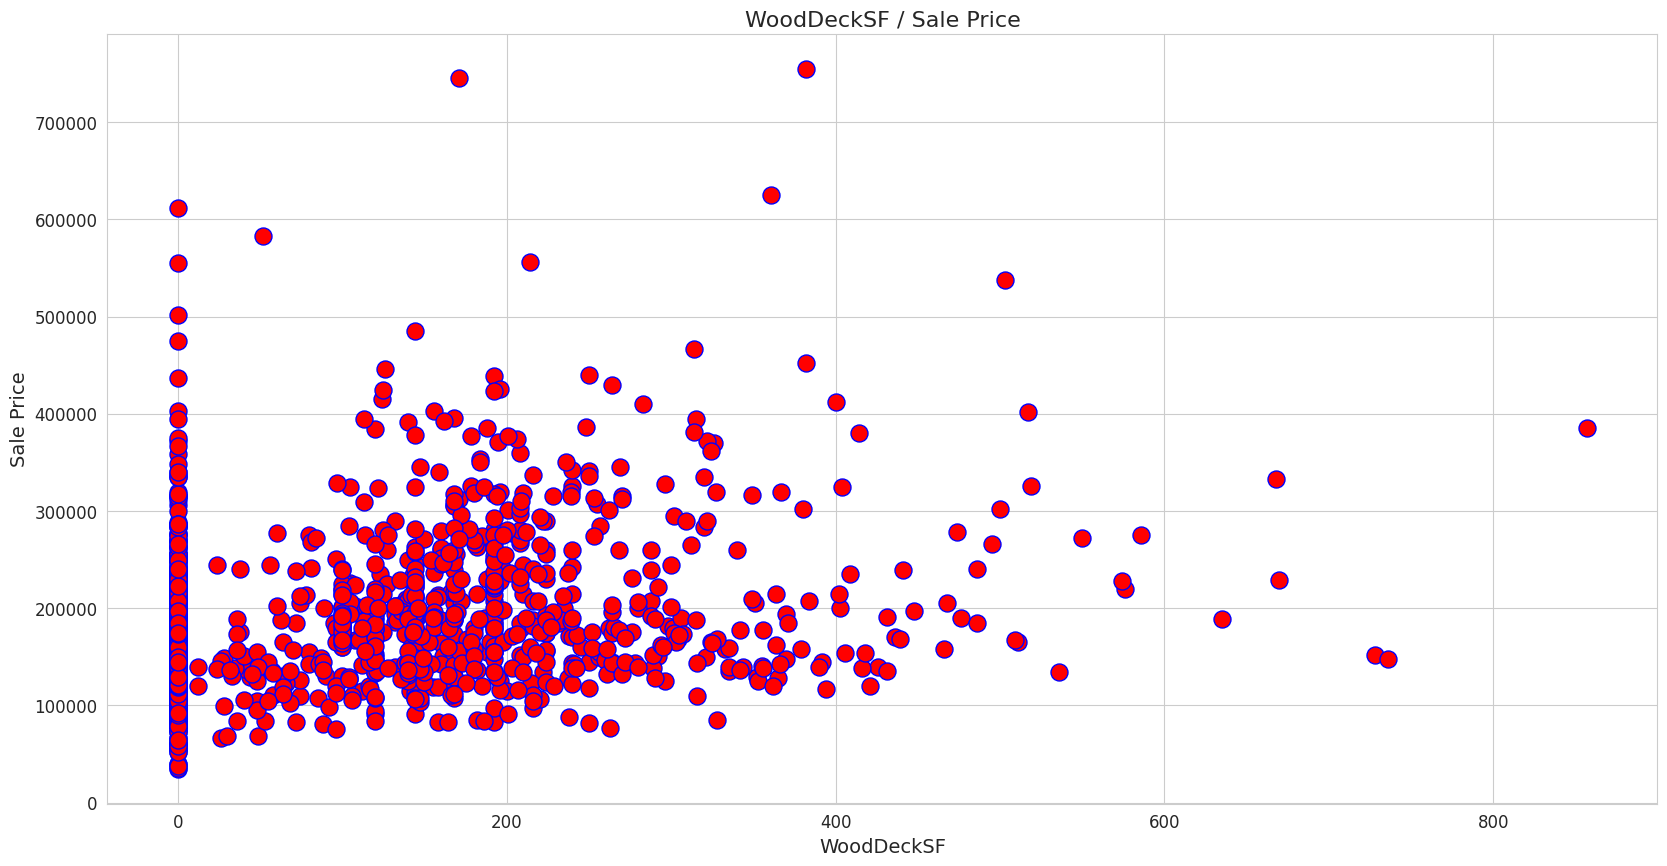

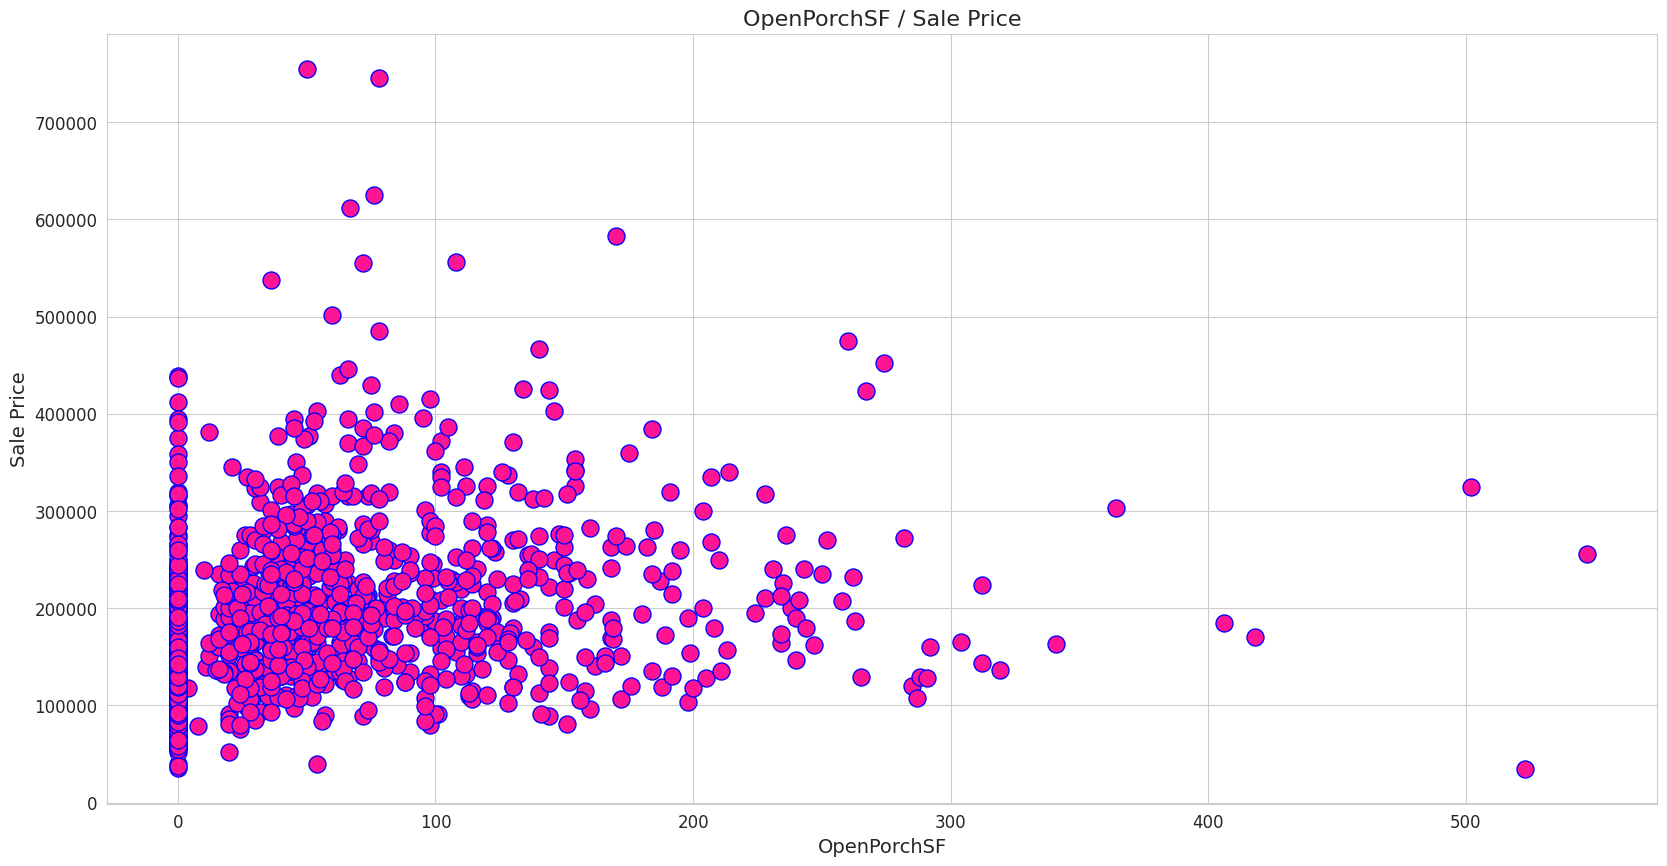

In [12]:
# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    sb.scatterplot(x = i[0], y = y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    sb.scatterplot(x = i[1], y = y_var, data = df, color = 'red', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    sb.scatterplot(x = i[2], y = y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    sb.scatterplot(x=i[3],y= y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    sb.scatterplot(x=i[4],y= y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    sb.scatterplot(x=i[5],y= y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    sb.scatterplot(x=i[6],y= y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    sb.scatterplot(x=i[7],y= y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    sb.scatterplot(x=i[8],y= y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    sb.scatterplot(x=i[9],y= y_var, data = df, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter_df('SalePrice')

<ipython-input-13-4bacfea29b12>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'], color = 'r')


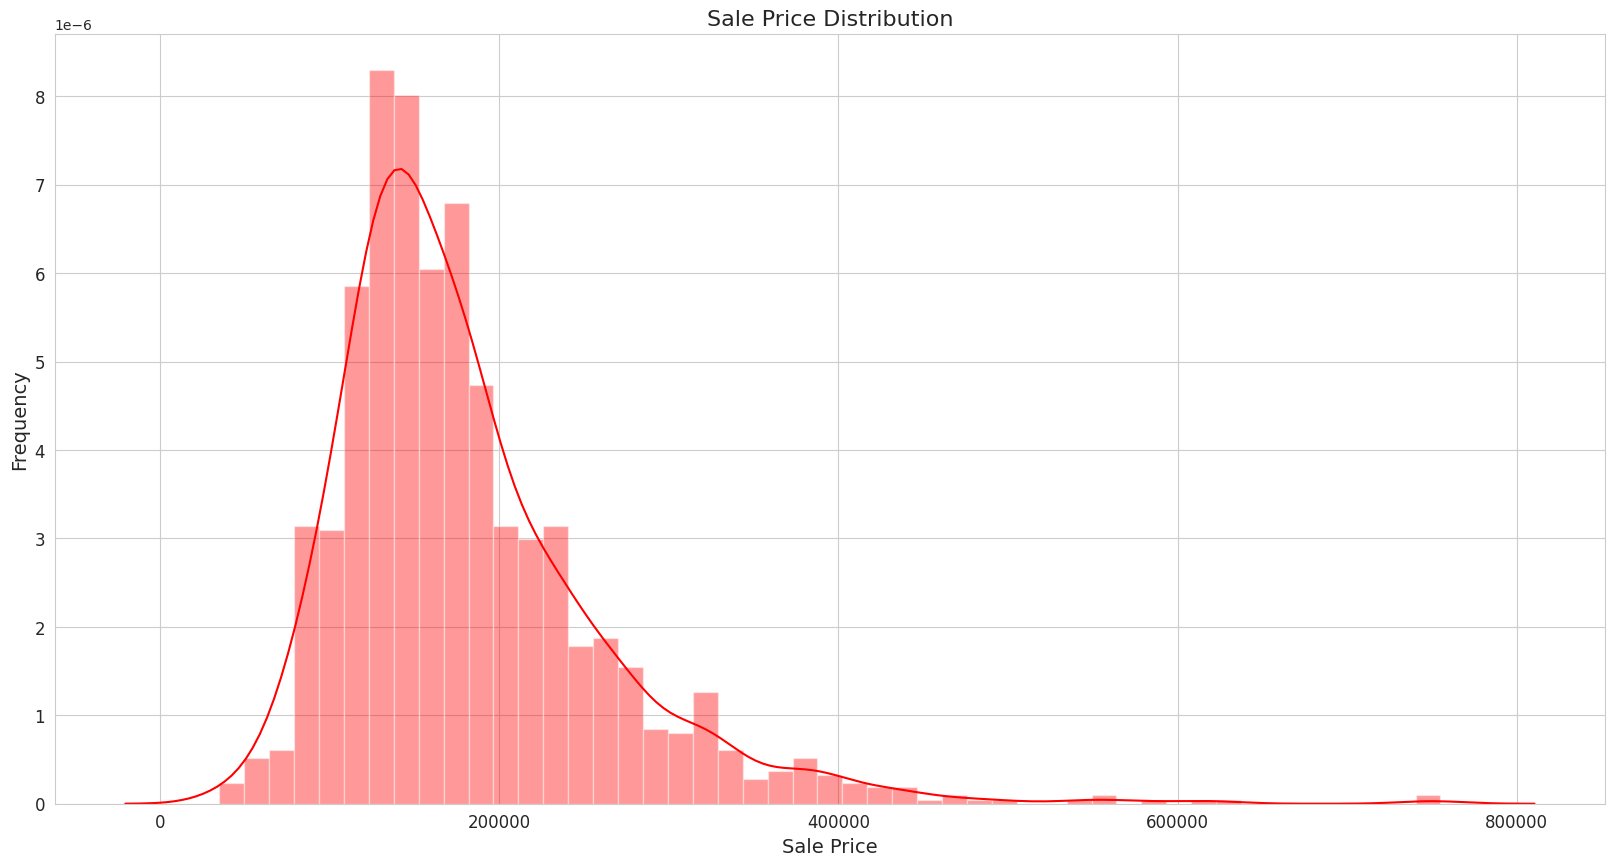

In [13]:
# 3. Distribution plot

sb.distplot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [14]:
# FEATURE SELECTION & DATA SPLIT

X_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[1.02000e+04 2.19000e+02 6.78000e+02 1.46100e+03 1.50900e+03 0.00000e+00
  1.50900e+03 6.00000e+02 2.24000e+02 0.00000e+00]
 [9.94700e+03 0.00000e+00 5.77000e+02 1.18800e+03 1.21700e+03 0.00000e+00
  1.21700e+03 4.97000e+02 1.68000e+02 2.70000e+01]
 [7.20000e+03 0.00000e+00 0.00000e+00 0.00000e+00 1.04000e+03 0.00000e+00
  1.04000e+03 6.25000e+02 0.00000e+00 0.00000e+00]
 [2.15245e+05 0.00000e+00 8.00000e+01 2.13600e+03 2.03600e+03 0.00000e+00
  2.03600e+03 5.13000e+02 0.00000e+00 0.00000e+00]
 [6.12000e+03 0.00000e+00 9.52000e+02 9.52000e+02 1.02200e+03 7.52000e+02
  1.77400e+03 4.68000e+02 9.00000e+01 0.00000e+00]]
X_test samples :  [[ 1953.   408.   174.   483.   483.   504.   987.   264.    72.     0.]
 [ 4500.   116.   319.  1216.  1216.     0.  1216.   402.     0.   125.]
 [10762.   344.   284.   978.  1005.   978.  1983.   490.     0.     0.]
 [39104.     0.    96.  1385.  1363.     0.  1363.   439.    81.     0.]
 [10005.   299.   768.  1160.  1156.   866.  

In [15]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(


In [16]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.7733369645921897
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7733369645949042
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7733370336570461
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.7729434024754469
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.773337033825872
-------------------------------------------------------------------------------


In [17]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.7723836362490331
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.7723836361689898
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.7723836936973347
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.7718873625592492
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.7723836929218632
-------------------------------------------------------------------------------
